In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [5]:
def fit_thalf(t,y,C=0,ax=False):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    thalf=np.log(2)/K


def calc_thalf(rmax,a,Pe,Pd0):
    return(rmax**2/(2*a*Pe)*np.log(1+Pe/(Pe-Pd0)))

def get_a_coeff(df_lin,tlf):
    tal=df_lin['t']-df_lin['tlf']
#     df_lin=df_lin[df_lin.tlf.eq(tlf) & df_lin.r.gt(5) & tal < 4./24]
    df_lin=df_lin[df_lin.tlf.eq(tlf) & df_lin.r.gt(5)]
    
    ax.plot(df_lin.dPdr,df_lin.Vrcol,'.')
    ax.grid(True)
    ax.set_xlabel('dPdr')
    ax.set_ylabel('Vrcol')
    m,c=np.polyfit(df_lin.dPdr,df_lin.Vrcol,1)
#     print(m)
    return(m)
    assert(0)

In [11]:
df=pd.read_pickle('dfs/df_tab_run_land_rr.pkl')
df_lin=df.query('r < rV10max*1.0')

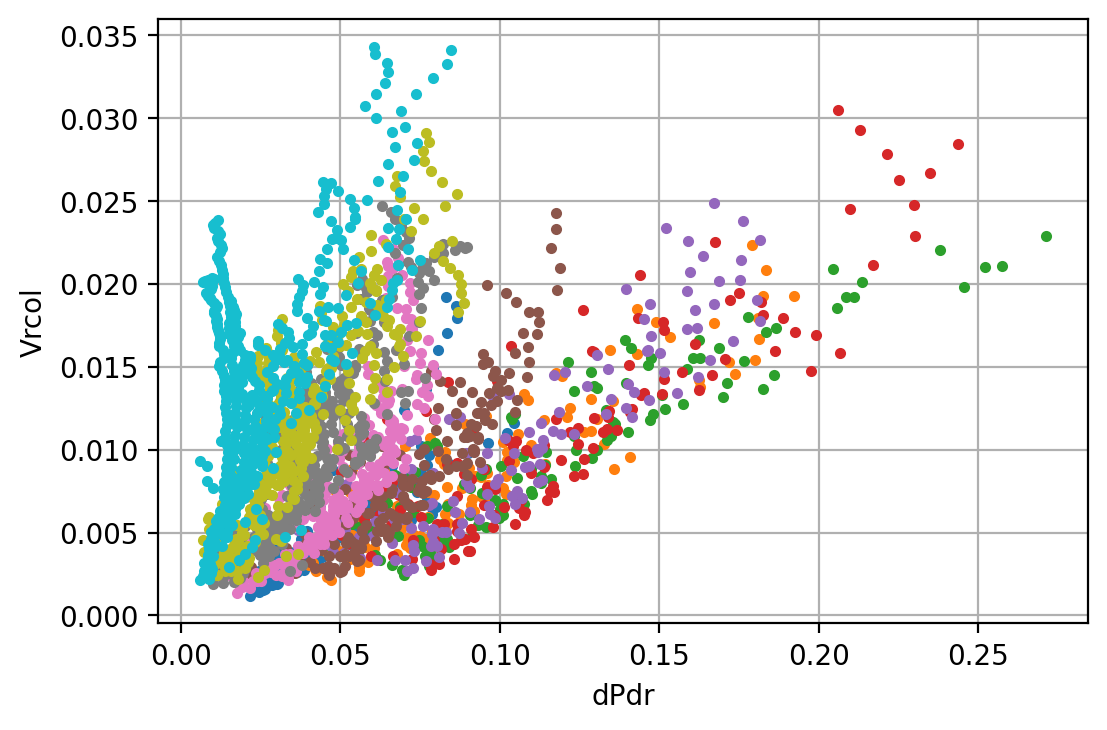

In [14]:

Pe=101600
lfts=np.arange(3,13)
thf=[]
tha=[]
rmax=[]
a_coef=[]
fig,ax=plt.subplots(1,1,dpi=200)
for lft in lfts:
#     print(lft)
    dfname='dfs/df_run_land_t' + "{:02d}".format(lft) + '_rr.pkl'
    df=pd.read_pickle(dfname)
    thf.append(fit_thalf(df.t[1:4],df.pmin[1:4]))
    rmax.append(df.rV10max[0])
    a=get_a_coeff(df_lin,lft-1)
    Pd0=Pe-df.pmin[0]*100
#     print(Pd0)
    
    tha.append(calc_thalf(rmax[-1]*1000,a,Pe,Pd0)/(60*60))
    a_coef.append(a)

Text(0.1, 0.8, 'R$^2$=0.17')

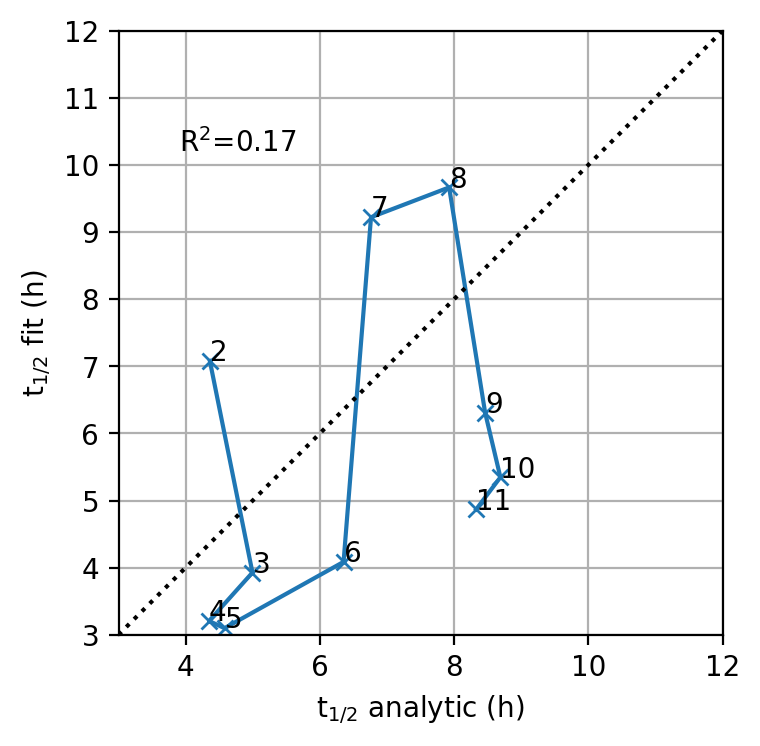

In [16]:
axr=(3,12)
fig,ax=plt.subplots(1,1,dpi=200)
ax.plot(tha,thf,'x-')
ax.grid(True)
ax.set_aspect('equal')
ax.set_ylim(axr)
ax.set_xlim(axr)
ax.plot(axr,axr,':k')
ax.set_xlabel('t$_{1/2}$ analytic (h)')
ax.set_ylabel('t$_{1/2}$ fit (h)')
for i,lft in enumerate(lfts):
    ax.text(tha[i],thf[i],lft-1)
r2=np.corrcoef(tha,thf)[0,1]**2
ax.text(0.1,0.8,"R$^2$={:2.2f}".format(r2),transform=ax.transAxes)